# `Matplotlib bar chart storytelling`

In [1]:
import pandas as pd
import duckdb
from constants import GRAY_1, GRAY_2, GRAY_3, BLUE_1, BLUE_2

df = pd.read_csv("data/norway_new_car_sales_by_make.csv")

df.head()

,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7
1,2007,1,Volkswagen,2521,19.9
2,2007,1,Peugeot,1029,8.1
3,2007,1,Ford,870,6.9
4,2007,1,Volvo,693,5.5


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4377 entries, 0 to 4376
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      4377 non-null   int64  
 1   Month     4377 non-null   int64  
 2   Make      4367 non-null   object 
 3   Quantity  4377 non-null   int64  
 4   Pct       4377 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 171.1+ KB


In [3]:
df_quantity_brand = duckdb.query(
"""--sql
    SELECT 
        make AS Brand, 
        SUM(quantity) AS Quantity
    FROM df 
    GROUP BY brand
    ORDER BY quantity DESC
"""
).df().set_index("Brand")

df_quantity_brand

,Quantity
Brand,
Volkswagen,206669.0
Toyota,168177.0
Volvo,99937.0
Ford,99713.0
BMW,73315.0
...,...
McLaren,1.0
Infiniti,1.0
Tata,1.0


## `Bar chart`

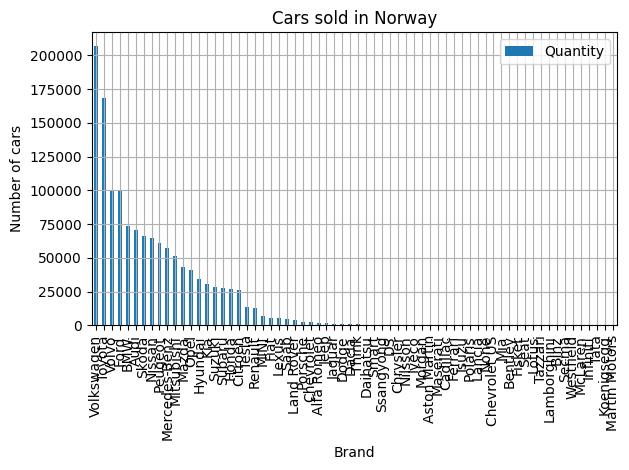

In [4]:
ax = df_quantity_brand.plot(
    kind="bar", title="Cars sold in Norway", ylabel="Number of cars"
)
ax.grid()
fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/bar_chart_initial.png")

In [5]:
df_quantity_brand.iloc[:10]

,Quantity
Brand,
Volkswagen,206669.0
Toyota,168177.0
Volvo,99937.0
Ford,99713.0
BMW,73315.0
Audi,70475.0
Skoda,66007.0
Nissan,64535.0
Peugeot,61033.0


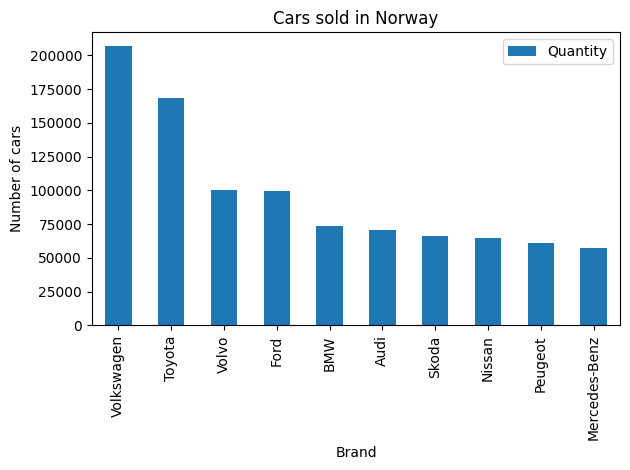

In [6]:
ax = df_quantity_brand.iloc[:10].plot(kind="bar", title="Cars sold in Norway", ylabel="Number of cars")

fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/bar_chart_top10.png", dpi=300)

## apply data storytelling

- remove clutter
- contrast
- colors sparingly
- descriptive title and labels
- positioning title and labels
- proximity principle with annotations
- percentage instead of absolute values 
- horizontal bar

In [7]:
df_percentage = df_quantity_brand["Quantity"] / df_quantity_brand["Quantity"].sum() * 100

df_percentage

Brand
Volkswagen       15.340063
Toyota           12.482984
Volvo             7.417851
Ford              7.401225
BMW               5.441826
                   ...    
McLaren           0.000074
Infiniti          0.000074
Tata              0.000074
Koenigsegg        0.000074
Martin Motors     0.000074
Name: Quantity, Length: 66, dtype: float64

In [8]:
df_percentage_top10 = df_percentage.iloc[:10]

colors = [GRAY_1]*len(df_percentage_top10)
colors[2] = BLUE_2
colors

['#CCCCCC',
 '#CCCCCC',
 '#2633a8',
 '#CCCCCC',
 '#CCCCCC',
 '#CCCCCC',
 '#CCCCCC',
 '#CCCCCC',
 '#CCCCCC',
 '#CCCCCC']

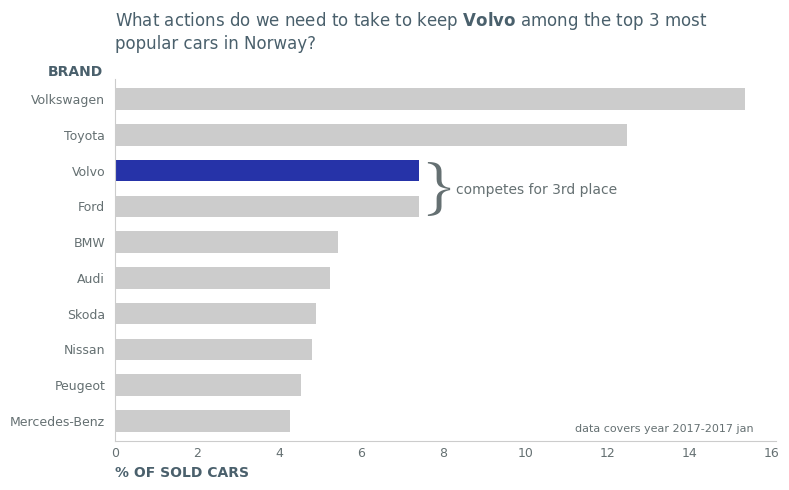

In [9]:
# horizontal bar chart
ax = df_percentage_top10.plot(
    kind="barh",
    ylabel="Number of cars",
    figsize=(8, 5),
    width=0.6,
    color=colors,
)

ax.invert_yaxis()

# remove clutter
ax.spines[["top", "right"]].set_visible(False)

# contrast
ax.spines[["left", "bottom"]].set_color(GRAY_1)
ax.tick_params(axis="both", colors=GRAY_2, labelsize=9, length=0, pad=5)
ax.tick_params(axis="y", pad=7)

# descriptive title and labels - call to action (CTA)
ax.set_title(
    "What actions do we need to take to keep "
    + r"$\bf{Volvo}$"  # LaTeX mode
    + " among the top 3 most\npopular cars in Norway?",
    loc="left",
    color=GRAY_3,
    pad=22,
)

ax.set_xlabel("% OF SOLD CARS", color=GRAY_3, fontweight="bold", loc="left")
ax.set_ylabel("BRAND", color=GRAY_3, fontweight="bold", rotation=0)

ax.yaxis.set_label_coords(-0.06, 1)

# annotations - proximity principle
ax.annotate(xy=(7.5, 2.97), text="}", fontsize=45, color=GRAY_2, family="Times")
ax.annotate(xy=(8.3, 2.65), text="competes for 3rd place", fontsize=10, color=GRAY_2)
ax.annotate(xy=(11.2, 9.3), text="data covers year 2017-2017 jan", fontsize=8, color=GRAY_2)

fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/bar_chart_storytelling.png", dpi=400)

In [10]:
help(ax.spines)

Help on Spines in module matplotlib.spines object:

class Spines(collections.abc.MutableMapping)
 |  Spines(**kwargs)
 |
 |  The container of all `.Spine`\s in an Axes.
 |
 |  The interface is dict-like mapping names (e.g. 'left') to `.Spine` objects.
 |  Additionally, it implements some pandas.Series-like features like accessing
 |  elements by attribute::
 |
 |      spines['top'].set_visible(False)
 |      spines.top.set_visible(False)
 |
 |  Multiple spines can be addressed simultaneously by passing a list::
 |
 |      spines[['top', 'right']].set_visible(False)
 |
 |  Use an open slice to address all spines::
 |
 |      spines[:].set_visible(False)
 |
 |  The latter two indexing methods will return a `SpinesProxy` that broadcasts all
 |  ``set_*()`` and ``set()`` calls to its members, but cannot be used for any other
 |  operation.
 |
 |  Method resolution order:
 |      Spines
 |      collections.abc.MutableMapping
 |      collections.abc.Mapping
 |      collections.abc.Collection